Descripció

Aprèn a realitzar mostreig de les dades amb Python.


- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('MLB.txt',sep='\t')

In [5]:
df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [6]:
df.describe()

,salary
count,828.000000
mean,3281.828339
std,4465.448980
min,400.000000
25%,418.315000
50%,1093.750000
75%,4250.000000
max,33000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [10]:
df.shape

(828, 4)

Random sample with 75 items

In [17]:
radoms_sample=df.sample(n=75, random_state=1)

In [19]:
radoms_sample.shape

(75, 4)

Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

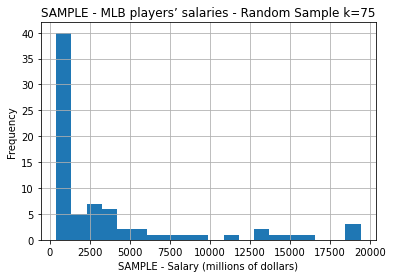

In [71]:
radoms_sample.hist(['salary'], bins=20)
plt.title('SAMPLE - MLB players’ salaries - Random Sample k=75')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'POPULATION - Salary (millions of dollars)')

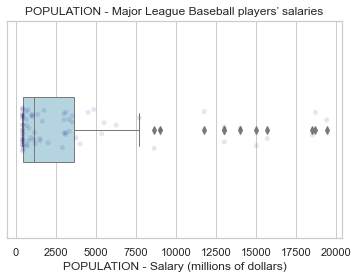

In [76]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=radoms_sample["salary"], color='lightblue', fliersize=5, linewidth=1 , width=0.3)
ax = sns.stripplot(x=radoms_sample["salary"], color='darkblue', alpha=0.1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

In [97]:
# Define systematic sampling function
def sys_samp(df, step,start=0):
    systematic_sample=df.iloc[start::step]
    return systematic_sample

In [98]:
systematic_sampling=sys_samp(df,5,3)
systematic_sampling

,player,team,position,salary
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.000
8,Conor Jackson,Arizona Diamondbacks,First Baseman,3100.000
13,Mark Reynolds,Arizona Diamondbacks,Third Baseman,833.333
18,Juan C. Gutierrez,Arizona Diamondbacks,Pitcher,411.000
23,Ian Kennedy,Arizona Diamondbacks,Pitcher,403.000
...,...,...,...,...
803,Matt Capps,Washington Nationals,Pitcher,3500.000
808,Adam Kennedy,Washington Nationals,Second Baseman,1250.000
813,Wil Nieves,Washington Nationals,Catcher,700.000
818,Alberto Gonzalez,Washington Nationals,Shortstop,415.500


In [99]:
systematic_sampling2=sys_samp(df,7)
systematic_sampling2

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
7,Stephen Drew,Arizona Diamondbacks,Shortstop,3400.0
14,Augie Ojeda,Arizona Diamondbacks,Shortstop,825.0
21,Gerardo Parra,Arizona Diamondbacks,Outfielder,405.5
28,Tim Hudson,Atlanta Braves,Pitcher,9000.0
...,...,...,...,...
798,Adam Dunn,Washington Nationals,First Baseman,12000.0
805,Chien-Ming Wang,Washington Nationals,Pitcher,2000.0
812,Jesus Flores,Washington Nationals,Catcher,750.0
819,Garrett Mock,Washington Nationals,Pitcher,411.0


Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

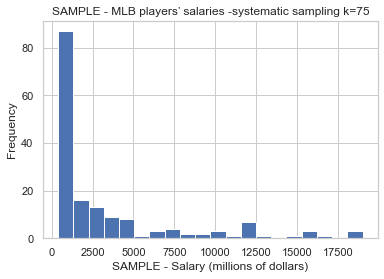

In [104]:
systematic_sampling.hist(['salary'], bins=20)
plt.title('SAMPLE - MLB players’ salaries -systematic sampling k=75')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

In [101]:
systematic_sampling.shape

(165, 4)

Text(0.5, 0, 'POPULATION - Salary (millions of dollars)')

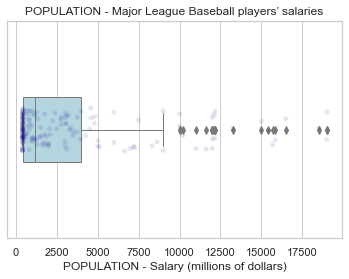

In [78]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=systematic_sampling["salary"], color='lightblue', fliersize=5, linewidth=1 , width=0.3)
ax = sns.stripplot(x=systematic_sampling["salary"], color='darkblue', alpha=0.1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

- Exercici 2

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
MLBStratified = df.groupby('position', group_keys = True).apply(pd.DataFrame.sample, frac=.145)
MLBStratified.head()

player                  team position  salary
position                                                            
Catcher  598  Jason Jaramillo    Pittsburgh Pirates  Catcher   416.5
         814      Chris Coste  Washington Nationals  Catcher   650.0
         601     Jeff Clement    Pittsburgh Pirates  Catcher   405.0
         776        John Buck     Toronto Blue Jays  Catcher  2000.0
         486     Henry Blanco         New York Mets  Catcher   750.0

In [84]:
MLBStratified.describe()

,salary
count,120.000000
mean,3163.323608
std,4098.890172
min,400.000000
25%,426.237500
50%,1200.000000
75%,4000.000000
max,20000.000000


In [82]:
MLBStratified2 = df.groupby('salary', group_keys = True).apply(pd.DataFrame.sample, frac=.145)
MLBStratified2.head()

player                 team        position  salary
salary                                                                 
400.0  464    Alex Burnett      Minnesota Twins         Pitcher   400.0
       77      Craig Tatum    Baltimore Orioles         Catcher   400.0
       270  Scott Sizemore       Detroit Tigers  Second Baseman   400.0
       184  Juan Francisco      Cincinnati Reds   Third Baseman   400.0
       710      Joe Mather  St. Louis Cardinals         Pitcher   400.0

In [85]:
MLBStratified2.describe()

,salary
count,68.000000
mean,2555.301471
std,3520.813514
min,400.000000
25%,412.125000
50%,925.000000
75%,3137.500000
max,15000.000000


Generate sample using SMOTE (Synthetic Minority Oversampling Technique).

Original dataset shape Counter({1: 90, 0: 10})


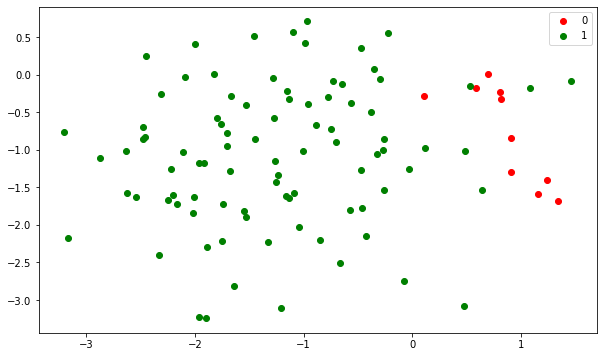

In [88]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.1, 0.9], n_informative=2, n_redundant=0,
                           flip_y=0, n_features=2, n_clusters_per_class=1, n_samples=100, random_state=10)

print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 90, 0: 10})

label_c = {0: 'red', 1: 'green'}

plt.figure(figsize=[10, 6])
for label in np.unique(y):
    ind = np.where(y == label)
    plt.scatter(X[ind][:, 0], X[ind][:, 1], c=label_c[label], label=label)
plt.legend()

In [89]:
m = SMOTE(k_neighbors=3, sampling_strategy=0.2, random_state=11)
X_res, y_res = sm.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 90, 0: 90})


In [90]:
print(sorted(Counter(y).items()))

[(0, 10), (1, 90)]


In [91]:
print(sorted(Counter(y_res).items()))

[(0, 90), (1, 90)]


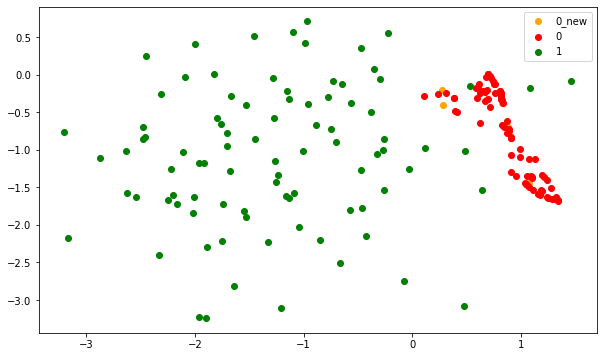

In [92]:
label_c = {0: 'red', 1: 'green'}

plt.figure(figsize=[10, 6])
for label in np.unique(y_res):
    ind = np.where(y_res == label)
    if label == 0:
        plt.scatter(X_res[ind][-8:, 0], X_res[ind][-8:, 1], c='orange', label='0_new')
        plt.scatter(X_res[ind][:-8, 0], X_res[ind][:-8, 1], c=label_c[label], label=label)
    else:
        plt.scatter(X_res[ind][:, 0], X_res[ind][:, 1], c=label_c[label], label=label)
plt.legend()

- Exercici 3

Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [23]:
def Reservoir_Sampling(steam,k):
    reservoir = []
    for i, element in enumerate(df.index.tolist()):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element
    return df.iloc[reservoir]

In [93]:
dfs=Reservoir_Sampling(df,5)
dfs

,player,team,position,salary
748,Colby Lewis,Texas Rangers,Pitcher,1750.0
647,Pablo Sandoval,San Francisco Giants,Third Baseman,465.0
484,Mike Jacobs,New York Mets,First Baseman,900.0
76,Nolan Reimold,Baltimore Orioles,Outfielder,400.0
393,James Loney,Los Angeles Dodgers,First Baseman,3100.0


In [95]:
dfs=Reservoir_Sampling(df,75)
dfs

,player,team,position,salary
494,Alex Rodriguez,New York Yankees,Third Baseman,33000.00
388,Vicente Padilla,Los Angeles Dodgers,Pitcher,5025.00
526,Rajai Davis,Oakland Athletics,Outfielder,1350.00
560,Shane Victorino,Philadelphia Phillies,Outfielder,5000.00
779,John McDonald,Toronto Blue Jays,Shortstop,1500.00
...,...,...,...,...
269,Austin Jackson,Detroit Tigers,Outfielder,400.00
566,Carlos Ruiz,Philadelphia Phillies,Catcher,1900.00
127,Tom Gorzelanny,Chicago Cubs,Pitcher,800.00
760,Tommy Hunter,Texas Rangers,Pitcher,409.85


Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

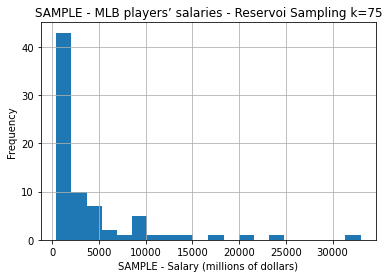

In [102]:
dfs.hist(['salary'], bins=20)
plt.title('SAMPLE - MLB players’ salaries - Reservoi Sampling k=75')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'POPULATION - Salary (millions of dollars)')

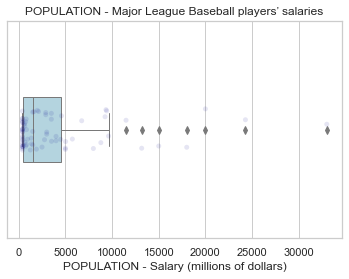

In [103]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dfs["salary"], color='lightblue', fliersize=5, linewidth=1 , width=0.3)
ax = sns.stripplot(x=dfs["salary"], color='darkblue', alpha=0.1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')